In [13]:
# 3.18 (a) Difference in conductivity due to coating type? alpha = 0.05.

import numpy as np
import scipy.stats as stats

# Conductivity data for each coating type
data = {
    'Coating 1': [143, 141, 150, 146],
    'Coating 2': [152, 149, 137, 143],
    'Coating 3': [134, 136, 132, 127],
    'Coating 4': [129, 127, 132, 129]
}

# One-way ANOVA
f_value, p_value = stats.f_oneway(data['Coating 1'], data['Coating 2'], data['Coating 3'], data['Coating 4'])

alpha = 0.05
if p_value < alpha:
    print(f"Reject the null hypothesis (p = {p_value:.4f}). There is a significant difference in conductivity due to coating type.")
else:
    print(f"Fail to reject the null hypothesis (p = {p_value:.4f}). No significant difference in conductivity due to coating type.")


Reject the null hypothesis (p = 0.0003). There is a significant difference in conductivity due to coating type.


In [14]:
# 3.18 (b): Overall mean and the treatment effects.
# Overall mean
all_data = np.concatenate(list(data.values()))
overall_mean = np.mean(all_data)

# Treatment effects 
treatment_effects = {key: np.mean(value) - overall_mean for key, value in data.items()}

print(f"Overall mean: {overall_mean:.2f}")
print("Treatment effects:")
for key, effect in treatment_effects.items():
    print(f"{key}: {effect:.2f}")


Overall mean: 137.94
Treatment effects:
Coating 1: 7.06
Coating 2: 7.31
Coating 3: -5.69
Coating 4: -8.69


In [15]:
# 3.18 (c): Compute 95 percent confidence interval estimate of the mean of coating type 4.

# Mean and standard error Coating 4
mean_coating4 = np.mean(data['Coating 4'])
std_err_coating4 = stats.sem(data['Coating 4'])

# 95% confidence interval Coating 4
ci_95_coating4 = stats.t.interval(0.95, len(data['Coating 4']) - 1, loc=mean_coating4, scale=std_err_coating4)

# Difference in means Coating 1 and Coating 4
mean_diff_1_4 = np.mean(data['Coating 1']) - np.mean(data['Coating 4'])
pooled_std_err = np.sqrt(stats.sem(data['Coating 1'])**2 + stats.sem(data['Coating 4'])**2)

# Compute a 99 percent confidence interval estimate of the mean difference between coating types 1 and 4.

# 99% confidence interval for the difference in means
ci_99_diff_1_4 = stats.t.interval(0.99, len(all_data) - 2, loc=mean_diff_1_4, scale=pooled_std_err)

# Convert to regular Python floats and display
ci_95_coating4 = tuple(map(float, ci_95_coating4))
ci_99_diff_1_4 = tuple(map(float, ci_99_diff_1_4))

print(f"95% CI for Coating 4: {ci_95_coating4}")
print(f"99% CI for difference between Coating 1 and Coating 4: {ci_99_diff_1_4}")


95% CI for Coating 4: (125.96960943386408, 132.5303905661359)
99% CI for difference between Coating 1 and Coating 4: (9.16327996977305, 22.33672003022695)


In [16]:
# 3.18 (d): Test all pairs of means using the Fisher LSD method. alpha = 0.05.

from itertools import combinations

# Calculate mean, standard error
means = {key: np.mean(value) for key, value in data.items()}
std_err = {key: stats.sem(value) for key, value in data.items()}

# Fisher's LSD
alpha = 0.05
df = len(all_data) - len(data)  # degrees of freedom
t_crit = stats.t.ppf(1 - alpha / 2, df)  # critical t value

# Test pairs of means
for pair in combinations(data.keys(), 2):
    diff = abs(means[pair[0]] - means[pair[1]])
    pooled_se = np.sqrt(std_err[pair[0]]**2 + std_err[pair[1]]**2)
    lsd = t_crit * pooled_se
    if diff > lsd:
        print(f"Significant difference between {pair[0]} and {pair[1]} (diff = {diff:.2f}, LSD = {lsd:.2f})")
    else:
        print(f"No significant difference between {pair[0]} and {pair[1]} (diff = {diff:.2f}, LSD = {lsd:.2f})")


No significant difference between Coating 1 and Coating 2 (diff = 0.25, LSD = 8.41)
Significant difference between Coating 1 and Coating 3 (diff = 12.75, LSD = 5.99)
Significant difference between Coating 1 and Coating 4 (diff = 15.75, LSD = 4.82)
Significant difference between Coating 2 and Coating 3 (diff = 13.00, LSD = 8.38)
Significant difference between Coating 2 and Coating 4 (diff = 16.00, LSD = 7.59)
No significant difference between Coating 3 and Coating 4 (diff = 3.00, LSD = 4.77)


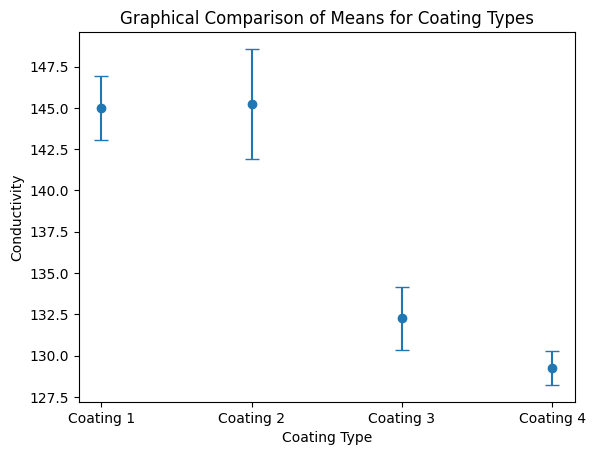

(f) Example: 

Coating type 2 has significantly lower conductivity than coating type 4. The manufacturer should switch to coating type 2 to minimize conductivity.


In [20]:
# 3.18 (e): Use the graphical method discussed in Section 3.5.3 to compare the means. 
# Which coating type produces the highest conductivity?
import matplotlib.pyplot as plt

# Plot means with confidence intervals
means_values = [np.mean(data[key]) for key in data.keys()]
errors = [stats.sem(data[key]) for key in data.keys()]

plt.errorbar(list(data.keys()), means_values, yerr=errors, fmt='o', capsize=5, label='Means ± SEM')
plt.xlabel('Coating Type')
plt.ylabel('Conductivity')
plt.title('Graphical Comparison of Means for Coating Types')
plt.show()

# 3.18 (f): Assuming that coating type 4 is currently in use, what are your recommendations to the manufacturer?
# Example for (f)

lowest_mean_coating = 2  # Coating 2 has the lowest mean
is_significant = True     # Assume the difference is statistically significant
print ("(f) Example: \n")
if lowest_mean_coating == 4:
    print("Coating type 4 has the lowest conductivity, so the manufacturer should continue using it to minimize conductivity.")
elif is_significant:
    print(f"Coating type {lowest_mean_coating} has significantly lower conductivity than coating type 4. The manufacturer should switch to coating type {lowest_mean_coating} to minimize conductivity.")
else:
    print("There is no statistically significant difference between the coating types, so the manufacturer can continue using coating type 4.")


In [6]:
# 3.20 (a): Is there any difference in compressive strength due to the rodding level? Use alpha = 0.05.

# Data for compressive strength
data_rod = {
    'Rodding 10': [1530, 1530, 1440],
    'Rodding 15': [1610, 1650, 1500],
    'Rodding 20': [1560, 1730, 1530],
    'Rodding 25': [1500, 1490, 1510]
}

# One-way ANOVA
f_value_rod, p_value_rod = stats.f_oneway(data_rod['Rodding 10'], data_rod['Rodding 15'], data_rod['Rodding 20'], data_rod['Rodding 25'])

if p_value_rod < alpha:
    print(f"Reject the null hypothesis (p = {p_value_rod:.4f}). There is a significant difference in compressive strength due to rodding level.")
else:
    print(f"Fail to reject the null hypothesis (p = {p_value_rod:.4f}). No significant difference in compressive strength due to rodding level.")

# 3.20 (b): Find the P-value for the F statistic in part (a).


Fail to reject the null hypothesis (p = 0.2138). No significant difference in compressive strength due to rodding level.


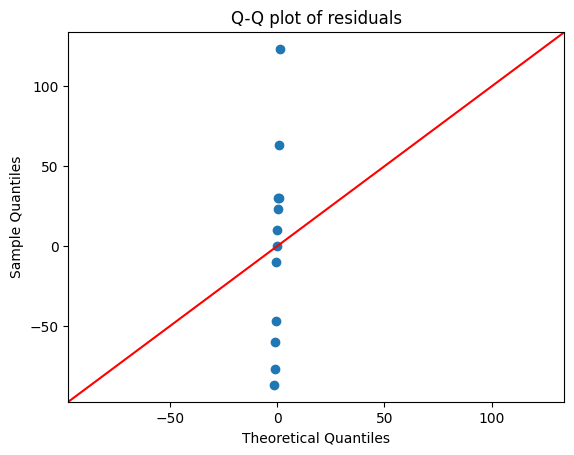

In [21]:
# 3.20 (c): Analyze the residuals from this experiment. 
# What conclusions can you draw about the underlying model assumptions?

# Residual analysis
from statsmodels.formula.api import ols
import pandas as pd
import statsmodels.api as sm

# Data for residual analysis
df_rod = pd.DataFrame({
    'Strength': np.concatenate([data_rod['Rodding 10'], data_rod['Rodding 15'], data_rod['Rodding 20'], data_rod['Rodding 25']]),
    'Rodding_Level': ['10']*3 + ['15']*3 + ['20']*3 + ['25']*3  # Use underscore to avoid spaces
})

# Model
model_rod = ols('Strength ~ C(Rodding_Level)', data=df_rod).fit()
residuals = model_rod.resid

# Plot residuals
sm.qqplot(residuals, line='45')
plt.title('Q-Q plot of residuals')
plt.show()



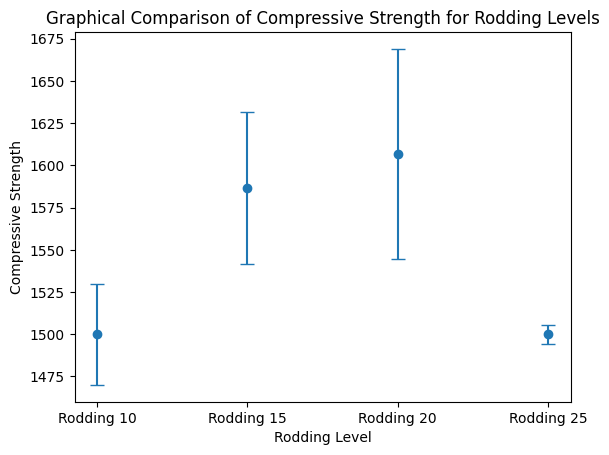

In [22]:
# 3.20 (d): Construct a graphical display to compare the treatment means as described in Section 3.5.3.
# Plot treatment means for rodding levels
means_rod = [np.mean(data_rod[key]) for key in data_rod.keys()]
errors_rod = [stats.sem(data_rod[key]) for key in data_rod.keys()]

plt.errorbar(list(data_rod.keys()), means_rod, yerr=errors_rod, fmt='o', capsize=5, label='Means ± SEM')
plt.xlabel('Rodding Level')
plt.ylabel('Compressive Strength')
plt.title('Graphical Comparison of Compressive Strength for Rodding Levels')
plt.show()
